In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
data = pd.read_excel('/content/drive/MyDrive/dataset.xlsx')

Mounted at /content/drive


In [ ]:
data = data[data.columns[data.isna().sum()/data.shape[0] < 0.9]]

In [ ]:
data.isna().sum()/data.shape[0]

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [ ]:
data["Patient addmited to regular ward (1=yes, 0=no)"].value_counts()

0    5565
1      79
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64

In [ ]:
data['SARS-Cov-2 exam result'] = data['SARS-Cov-2 exam result'].map({"positive": 1, "negative": 0})

In [ ]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(data.dropna()["Patient addmited to regular ward (1=yes, 0=no)"], data.dropna()['SARS-Cov-2 exam result'])

In [ ]:
pd.DataFrame({"p_value": [p_value], "corr": [corr]})



,p_value,corr
0,0.001083,0.323665


In [ ]:
data = data.drop(["Patient addmited to semi-intensive unit (1=yes, 0=no)",
"Patient addmited to intensive care unit (1=yes, 0=no)"], axis = 1)

In [ ]:
data.isna().sum()/data.shape[0]

Patient ID                                          0.000000
Patient age quantile                                0.000000
SARS-Cov-2 exam result                              0.000000
Patient addmited to regular ward (1=yes, 0=no)      0.000000
Hematocrit                                          0.893161
Hemoglobin                                          0.893161
Platelets                                           0.893338
Mean platelet volume                                0.893870
Red blood Cells                                     0.893338
Lymphocytes                                         0.893338
Mean corpuscular hemoglobin concentration (MCHC)    0.893338
Leukocytes                                          0.893338
Basophils                                           0.893338
Mean corpuscular hemoglobin (MCH)                   0.893338
Eosinophils                                         0.893338
Mean corpuscular volume (MCV)                       0.893338
Monocytes               

In [ ]:
data.select_dtypes("object").nunique()

Patient ID                     5644
Respiratory Syncytial Virus       2
Influenza A                       2
Influenza B                       2
Parainfluenza 1                   2
CoronavirusNL63                   2
Rhinovirus/Enterovirus            2
Coronavirus HKU1                  2
Parainfluenza 3                   2
Chlamydophila pneumoniae          2
Adenovirus                        2
Parainfluenza 4                   2
Coronavirus229E                   2
CoronavirusOC43                   2
Inf A H1N1 2009                   2
Bordetella pertussis              2
Metapneumovirus                   2
Parainfluenza 2                   1
Influenza B, rapid test           2
Influenza A, rapid test           2
dtype: int64

In [ ]:
data = data.drop(["Patient ID","Parainfluenza 2"], axis=1)

In [ ]:
data.shape

(5644, 35)

In [ ]:
data.select_dtypes("int").nunique()

Patient age quantile                              20
SARS-Cov-2 exam result                             2
Patient addmited to regular ward (1=yes, 0=no)     2
dtype: int64

In [ ]:
columns_to_check = data.select_dtypes("object").columns
columns_with_2_unique_values = data[columns_to_check].nunique() == 2
filtered_columns = columns_to_check[columns_with_2_unique_values].tolist()

filtered_columns

['Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Influenza B, rapid test',
 'Influenza A, rapid test']

In [ ]:
columns_to_check[columns_with_2_unique_values]

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza B, rapid test', 'Influenza A, rapid test'],
      dtype='object')

In [ ]:
columns_with_2_unique_values

Respiratory Syncytial Virus    True
Influenza A                    True
Influenza B                    True
Parainfluenza 1                True
CoronavirusNL63                True
Rhinovirus/Enterovirus         True
Coronavirus HKU1               True
Parainfluenza 3                True
Chlamydophila pneumoniae       True
Adenovirus                     True
Parainfluenza 4                True
Coronavirus229E                True
CoronavirusOC43                True
Inf A H1N1 2009                True
Bordetella pertussis           True
Metapneumovirus                True
Influenza B, rapid test        True
Influenza A, rapid test        True
dtype: bool

In [ ]:
data.columns[data.nunique().values == 2]

Index(['SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza B, rapid test', 'Influenza A, rapid test'],
      dtype='object')

In [ ]:
liste_viral = ((data.select_dtypes("object").nunique()==2).index).tolist()

In [ ]:
data['SARS-Cov-2 exam result'].isna().sum()

0

In [ ]:
dico = {"detected": 1, "not_detected": 0}

In [ ]:
for col in liste_viral:
  data[col] = data[col].map(dico)

In [ ]:
data['Respiratory Syncytial Virus'].unique()

array([nan,  0.,  1.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def pretraitement(data_set):
  data_set = data_set.fillna(0.12)
  #X = data_set.drop('SARS-Cov-2 exam result', axis = 1)
  #y = data_set['SARS-Cov-2 exam result']
  #X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
  train_set, test_set = train_test_split(data_set, test_size=0.2, random_state=0)
  #print(test_set['SARS-Cov-2 exam result'].value_counts())
  return train_set, test_set


In [ ]:
 train_set,test_set = pretraitement(data)

In [ ]:
X_train = train_set.drop('SARS-Cov-2 exam result', axis =1)
y_train = train_set['SARS-Cov-2 exam result']

X_test = test_set.drop('SARS-Cov-2 exam result', axis =1)
y_test = test_set['SARS-Cov-2 exam result']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
def training_model(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

In [ ]:
training_model(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1018
           1       0.36      0.04      0.07       111

    accuracy                           0.90      1129
   macro avg       0.63      0.51      0.51      1129
weighted avg       0.85      0.90      0.86      1129



In [ ]:
training_model(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       1.00      0.04      0.07       111

    accuracy                           0.91      1129
   macro avg       0.95      0.52      0.51      1129
weighted avg       0.91      0.91      0.86      1129



In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
N, train_score, val_score = learning_curve(RandomForestClassifier(), X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10),
                                           cv = 2,
                                           scoring='f1',)

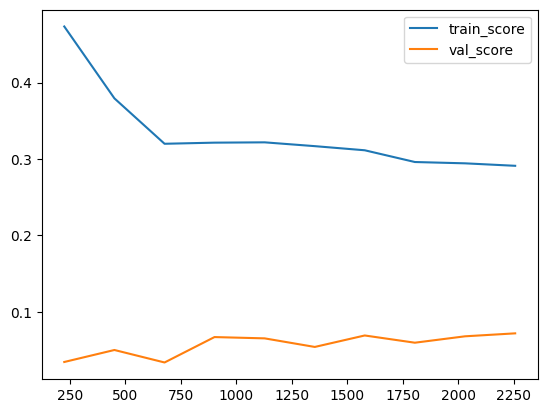

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(N, train_score.mean(axis = 1), label = "train_score")
plt.plot(N, val_score.mean(axis = 1), label ="val_score")
plt.legend()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Instanciation du suréchantillonneur aléatoire
oversampler = RandomOverSampler(random_state=42)

# Application du suréchantillonnage sur les données d'entraînement
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = oversampler.fit_resample(X_test, y_test)

In [ ]:
def test_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

In [ ]:
test_model(RandomForestClassifier(), X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)

              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1018
           1       0.60      0.65      0.62      1018

    accuracy                           0.61      2036
   macro avg       0.61      0.61      0.61      2036
weighted avg       0.61      0.61      0.61      2036



In [ ]:
N, train_score, val_score = learning_curve(RandomForestClassifier(), X_train_resampled, y_train_resampled,
                                           train_sizes=np.linspace(0.1, 1, 10),
                                           cv = 4,
                                           scoring='f1')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

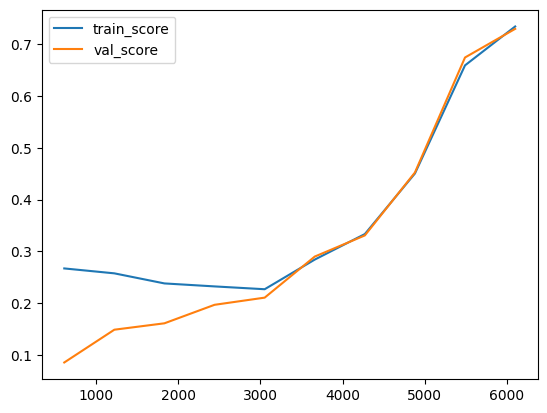

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(N, train_score.mean(axis = 1), label = "train_score")
plt.plot(N, val_score.mean(axis = 1), label ="val_score")
plt.legend()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()

X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

X_test_undersampled, y_test_undersampled = undersampler.fit_resample(X_test, y_test)

In [ ]:
test_model(RandomForestClassifier(),X_train_undersampled, y_train_undersampled,X_test_undersampled, y_test_undersampled)

              precision    recall  f1-score   support

           0       0.62      0.51      0.56       111
           1       0.58      0.68      0.63       111

    accuracy                           0.60       222
   macro avg       0.60      0.60      0.60       222
weighted avg       0.60      0.60      0.60       222



In [ ]:
N, train_score, val_score = learning_curve(RandomForestClassifier(), X_train_undersampled, y_train_undersampled,
                                           train_sizes=np.linspace(0.1, 1, 10),
                                           cv = 4,
                                           scoring='f1')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

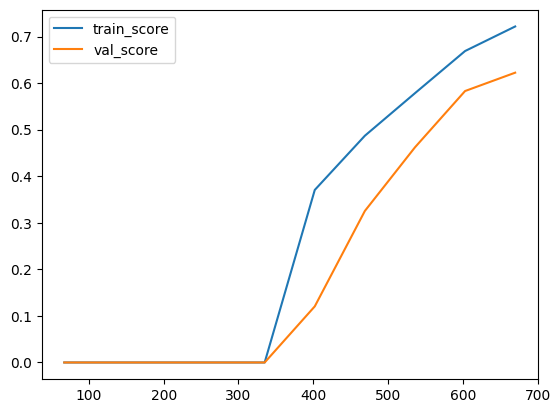

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(N, train_score.mean(axis = 1), label = "train_score")
plt.plot(N, val_score.mean(axis = 1), label ="val_score")
plt.legend()

In [ ]:
N, train_score, val_score = learning_curve(DecisionTreeClassifier(), X_train_resampled, y_train_resampled,
                                           train_sizes=np.linspace(0.1, 1, 10),
                                           cv = 4,
                                           scoring='f1')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

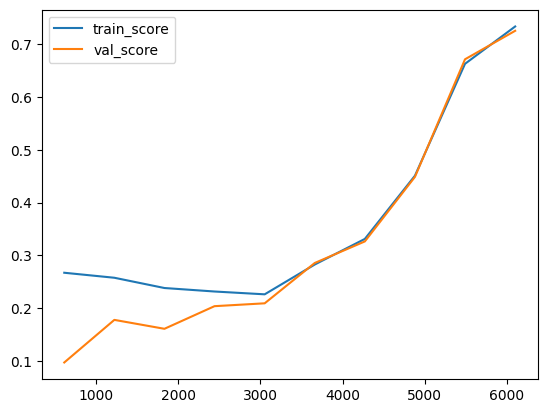

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(N, train_score.mean(axis = 1), label = "train_score")
plt.plot(N, val_score.mean(axis = 1), label ="val_score")
plt.legend()

In [ ]:
from xgboost import XGBClassifier, XGBRegressor


In [ ]:
test_model(XGBClassifier(), X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)

              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1018
           1       0.60      0.64      0.62      1018

    accuracy                           0.60      2036
   macro avg       0.60      0.60      0.60      2036
weighted avg       0.60      0.60      0.60      2036



In [ ]:
N, train_score, val_score = learning_curve(XGBClassifier(), X_train_resampled, y_train_resampled,
                                           train_sizes=np.linspace(0.1, 1, 10),
                                           cv = 4,
                                           scoring='f1')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

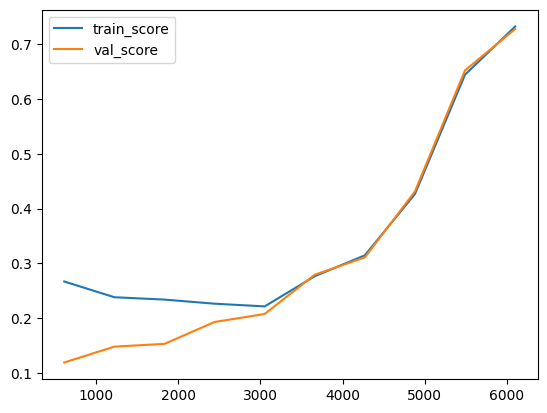

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(N, train_score.mean(axis = 1), label = "train_score")
plt.plot(N, val_score.mean(axis = 1), label ="val_score")
plt.legend()

In [ ]:
model = XGBClassifier()

In [ ]:
test_model(model, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)

              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1018
           1       0.60      0.64      0.62      1018

    accuracy                           0.60      2036
   macro avg       0.60      0.60      0.60      2036
weighted avg       0.60      0.60      0.60      2036



<Axes: >

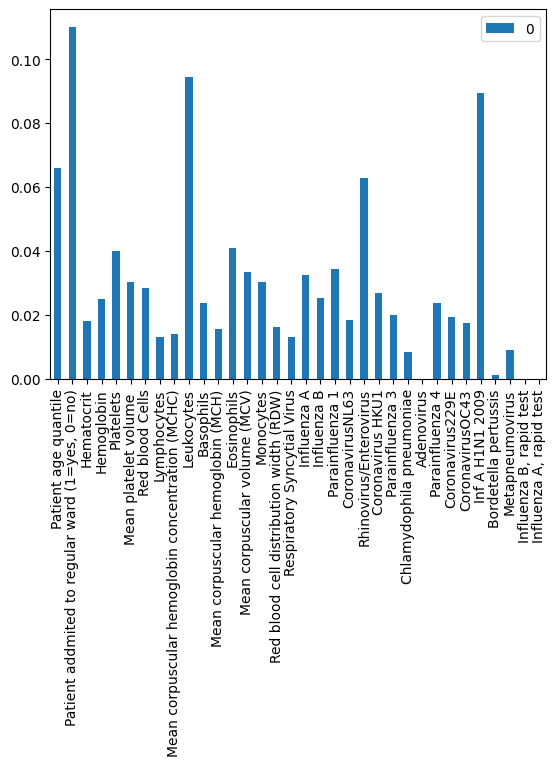

In [ ]:
pd.DataFrame(model.feature_importances_, index = X_train_resampled.columns).plot.bar()

In [ ]:
pd.DataFrame(model.feature_importances_, index = X_train_resampled.columns)

,0
Patient age quantile,0.066053
"Patient addmited to regular ward (1=yes, 0=no)",0.110167
Hematocrit,0.018175
Hemoglobin,0.024811
Platelets,0.039961
Mean platelet volume,0.030395
Red blood Cells,0.028457
Lymphocytes,0.013154
Mean corpuscular hemoglobin concentration (MCHC),0.013937
Leukocytes,0.094551


In [ ]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(model, threshold=0.02)

# Adapter le sélecteur aux données d'entraînement
selector.fit(X_train_resampled, y_train_resampled)

# Obtenir les indices des fonctionnalités sélectionnées
selected_feature_indices = selector.get_support(indices=True)

# Obtenir les noms des colonnes sélectionnées
selected_columns = X_train_resampled.columns[selected_feature_indices]

In [ ]:
selected_columns

Index(['Patient age quantile',
       'Patient addmited to regular ward (1=yes, 0=no)', 'Hemoglobin',
       'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Leukocytes',
       'Basophils', 'Eosinophils', 'Mean corpuscular volume (MCV)',
       'Monocytes', 'Influenza A', 'Influenza B', 'Parainfluenza 1',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 4',
       'Inf A H1N1 2009'],
      dtype='object')

In [ ]:
X_train_resampled1=X_train_resampled[selected_columns]
X_test_resampled1=X_test_resampled[selected_columns]

In [ ]:
test_model(model, X_train_resampled1, y_train_resampled, X_test_resampled1, y_test_resampled)

              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1018
           1       0.60      0.65      0.62      1018

    accuracy                           0.61      2036
   macro avg       0.61      0.61      0.61      2036
weighted avg       0.61      0.61      0.61      2036



In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à rechercher
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

# Créer une instance du modèle XGBoost


# Créer une instance de GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# Adapter GridSearchCV aux données d'entraînement
grid_search.fit(X_train_resampled1, y_train_resampled)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", best_params)
print("Meilleur score :", best_score)


Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}
Meilleur score : 0.7307131202386979


In [ ]:
model = XGBClassifier(**best_params)

In [ ]:
test_model(model, X_train_resampled1, y_train_resampled, X_test_resampled1, y_test_resampled)

              precision    recall  f1-score   support

           0       0.81      0.30      0.44      1018
           1       0.57      0.93      0.71      1018

    accuracy                           0.61      2036
   macro avg       0.69      0.61      0.57      2036
weighted avg       0.69      0.61      0.57      2036



In [ ]:
N, train_score, val_score = learning_curve(model, X_train_resampled, y_train_resampled,
                                           train_sizes=np.linspace(0.1, 1, 10),
                                           cv = 4,
                                           scoring='f1')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

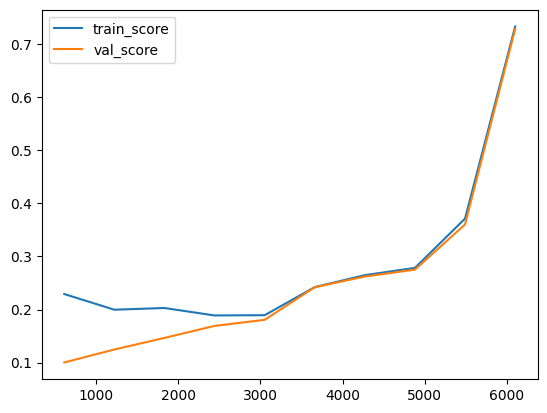

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(N, train_score.mean(axis = 1), label = "train_score")
plt.plot(N, val_score.mean(axis = 1), label ="val_score")
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à rechercher
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

# Créer une instance du modèle XGBoost


# Créer une instance de GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Adapter GridSearchCV aux données d'entraînement
grid_search.fit(X_train_resampled1, y_train_resampled)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", best_params)
print("Meilleur score :", best_score)

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Meilleur score : 0.6851029690919058


In [ ]:
model = XGBClassifier(**best_params)

In [ ]:
test_model(model, X_train_resampled1, y_train_resampled, X_test_resampled1, y_test_resampled)

              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1018
           1       0.59      0.64      0.62      1018

    accuracy                           0.60      2036
   macro avg       0.60      0.60      0.60      2036
weighted avg       0.60      0.60      0.60      2036



In [ ]:
data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),...,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
data.select_dtypes("float").nunique()

Hematocrit                                          176
Hemoglobin                                           84
Platelets                                           249
Mean platelet volume                                 48
Red blood Cells                                     211
Lymphocytes                                         318
Mean corpuscular hemoglobin concentration (MCHC)     57
Leukocytes                                          475
Basophils                                            17
Mean corpuscular hemoglobin (MCH)                    91
Eosinophils                                          86
Mean corpuscular volume (MCV)                       190
Monocytes                                           146
Red blood cell distribution width (RDW)              61
Respiratory Syncytial Virus                           2
Influenza A                                           2
Influenza B                                           2
Parainfluenza 1                                 

In [ ]:
data['Influenza B, rapid test'].values

array([nan, nan, nan, ..., nan, nan, nan])